<h1 style="font-family: Cambria; text-align: center;">
Dataset Loading
</h1>

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
sys.path.append(os.path.abspath('../src'))
from dataset import FlowDataset

<div style="font-family: Cambria;">
Replace "DATA_PATH" with your specific direcotry to .hdf5 file.
</div>

In [3]:
DATA_PATH = "/data1/wangteng/processed/channel_flow.hdf5"

<h2 style="font-family: Cambria; text-align: center;">
Task 1: Check of the Dataloader
</h2>

In [4]:
# Check if the file exists.
if not os.path.exists(DATA_PATH):
    print(f"File not found: {DATA_PATH}")
else:
    print(f"Target HDF5: {DATA_PATH}")

# Initialize the dataset.
try:
    dataset = FlowDataset(file_path=DATA_PATH)
    print("Dataset Initialized Successfully!")
except Exception as e:
    print(f"Initialization Failed: {e}")

Target HDF5: /data1/wangteng/processed/channel_flow.hdf5
FlowDataset initialized.
    Total Snapshots: 21
    Total items    : 4410
Dataset Initialized Successfully!


<div style="font-family: Cambria;">
Random sampling and check its basic information.
</div>

In [5]:
SEED = 42
np.random.seed(SEED)

idx = np.random.randint(0, len(dataset))

In [6]:
try:
    feats, labels, dt = dataset[idx]

    print(f"Inspecting Sample at Index {idx}...")
    print(f"   Input Shape (Feats)  : {feats.shape}  (Expected: [4, 32, 32, 32])")
    print(f"   Target Shape (Labels): {labels.shape} (Expected: [4, 32, 32, 32])")
    print(f"   Time Delta (dt)      : {dt.item():.4f}")
except Exception as e:
    print(f"    GetItem Failed: {e}")

Inspecting Sample at Index 860...
   Input Shape (Feats)  : torch.Size([4, 32, 32, 32])  (Expected: [4, 32, 32, 32])
   Target Shape (Labels): torch.Size([4, 32, 32, 32]) (Expected: [4, 32, 32, 32])
   Time Delta (dt)      : -0.1000


<h2 style="font-family: Cambria; text-align: center;">
Task 2: Slice Visualization
</h2>

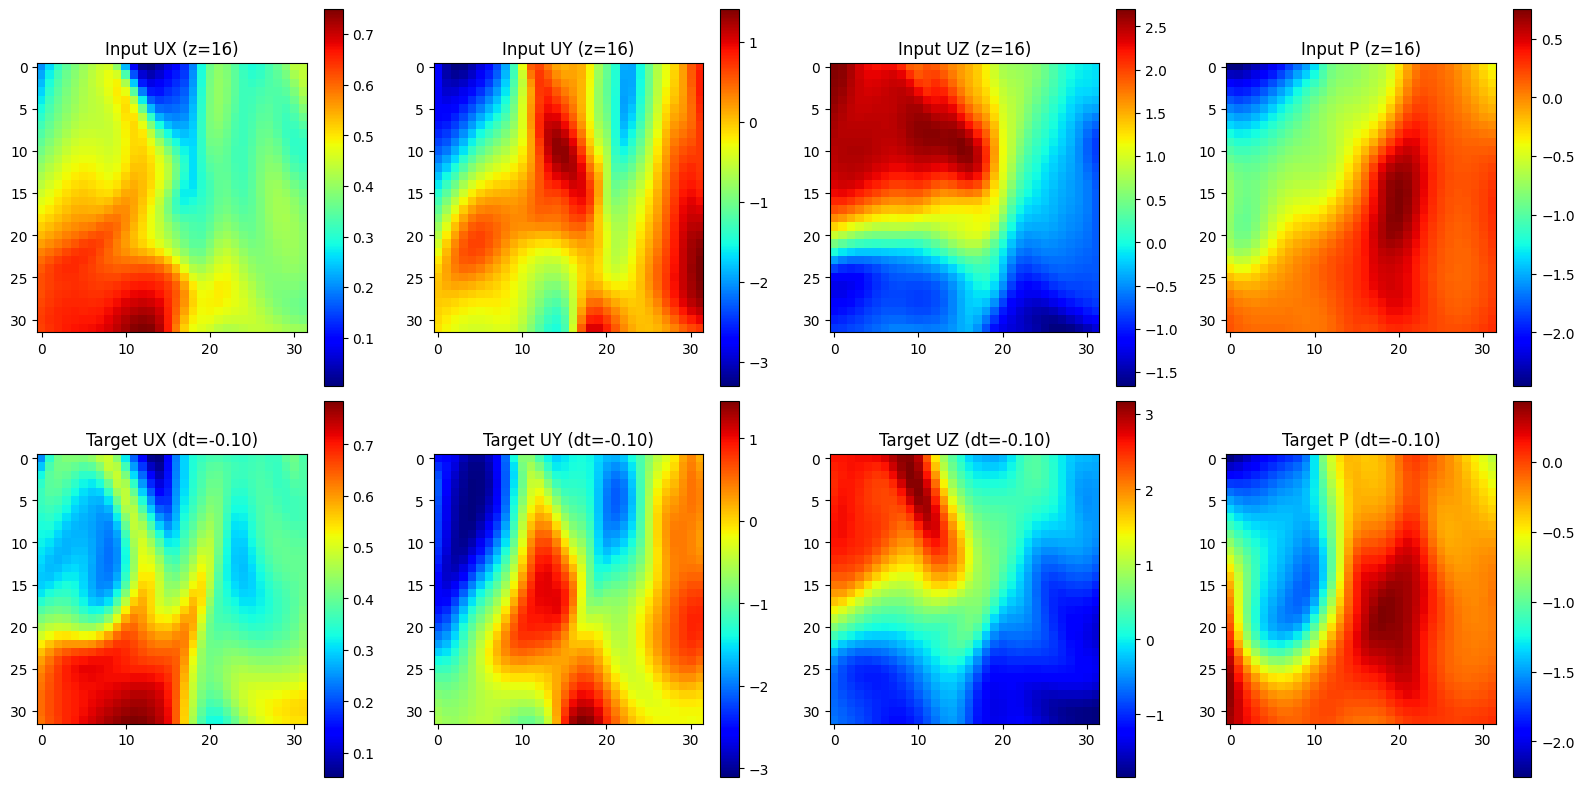

In [7]:
feats, labels, dt = dataset[idx]

# Randomly select a z-slice.
var_names, z_slice = ['UX', 'UY', 'UZ', 'P'], 16

# Visualize.
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i in range(4):
    # Input Feats
    im1 = axes[0, i].imshow(feats[i, z_slice, :, :].numpy(), cmap='jet')
    axes[0, i].set_title(f"Input {var_names[i]} (z={z_slice})")
    plt.colorbar(im1, ax=axes[0, i])
    
    # Target Labels
    im2 = axes[1, i].imshow(labels[i, z_slice, :, :].numpy(), cmap='jet')
    axes[1, i].set_title(f"Target {var_names[i]} (dt={dt:.2f})")
    plt.colorbar(im2, ax=axes[1, i])

plt.tight_layout()
plt.show()